In [1]:
from spectre import eigensolver
from pylab import *
import matplotlib.cm as cm
%matplotlib inline

# Harmonic Oscillator Example

In [65]:
hbar = 1/(2*np.pi)
m = 1                     # oscillator mass
omega = 2 * np.pi         # oscillator frequency in GHz
x0 = 0                  # shift in oscillator potiential minimum
k = - hbar ** 2 / (2 * m) # Coefficient of kinetic term (no minus sign)
U1 = lambda x: 1/2.0 * m * (omega ** 2) * ((x - x0) ** 2)

[ 0.5  1.5  2.5  3.5  4.5]


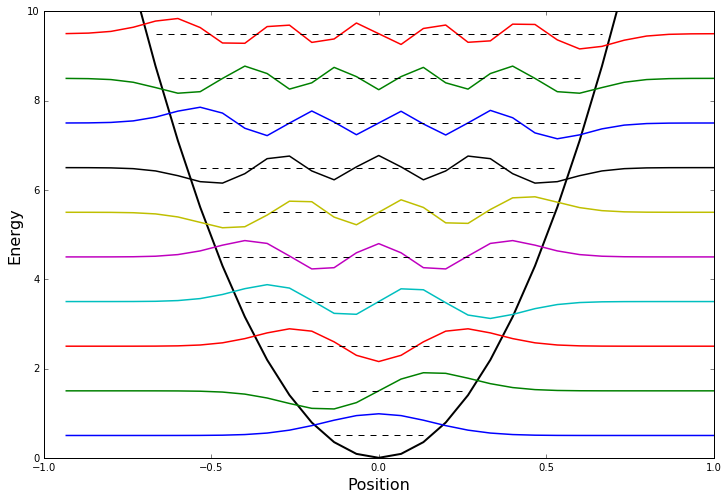

In [68]:
evals, evecs, x = eigensolver(U1, N=[30], domain=[[-1,1]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U1(x),'k-',lw=2)
for n in range(10):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1.5)
    mask = np.where(Y>U1(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')
ylim([0,10])
xlim([-1,1])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

# Moorse Potential

In [4]:
D = 5.0
b = 0.5
U2 = lambda x: D*(1-np.exp(-b*x))**2

[ 0.12503146  0.37034495  0.60932586  0.8419742   1.06828996]


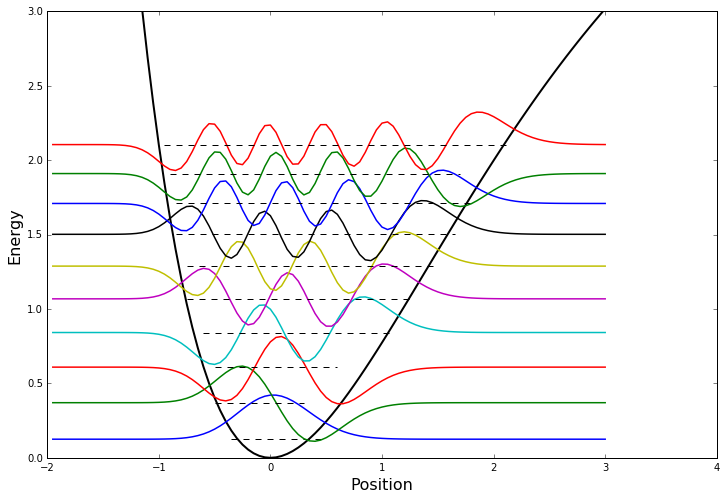

In [5]:
evals, evecs, x = eigensolver(U2,N=[100],domain=[[-2,3]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U2(x),'k-',lw=2)
for n in range(10):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1.5)
    mask = np.where(Y>U2(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')
ylim([0,3])
xlim([-2,4])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

# $Cos(x)$ Potential

In [6]:
U3 = lambda x: np.cos(x)+1

[ 0.07877778  0.2346999   0.38729967  0.53645947  0.68204667]


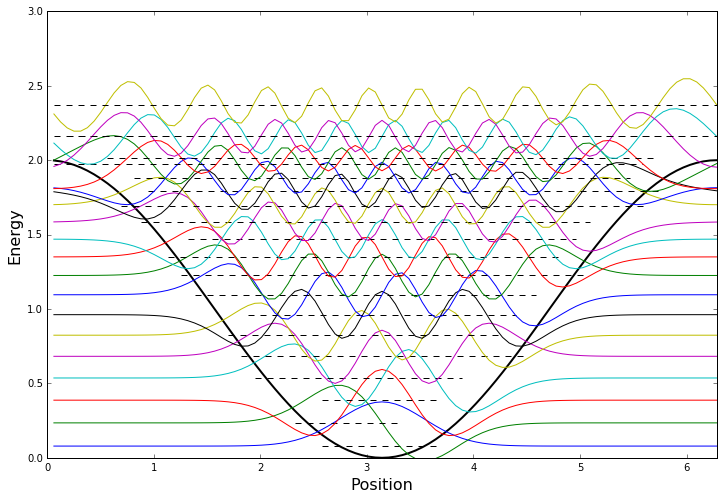

In [41]:
evals, evecs, x = eigensolver(U3,N=[100],domain=[[0,2*np.pi]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U3(x),'k-',lw=2)
for n in range(20):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1)
    mask = np.where(Y>U3(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')
xlim([0,2*np.pi]); ylim([0,3])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

# Double-Well Potential

In [46]:
a = 0
b = 3
U4 = lambda x: 1/b**4*((x-a/2)**2-b**2)**2

[ 0.07430716  0.07430716  0.21991958  0.21991959  0.3606945 ]


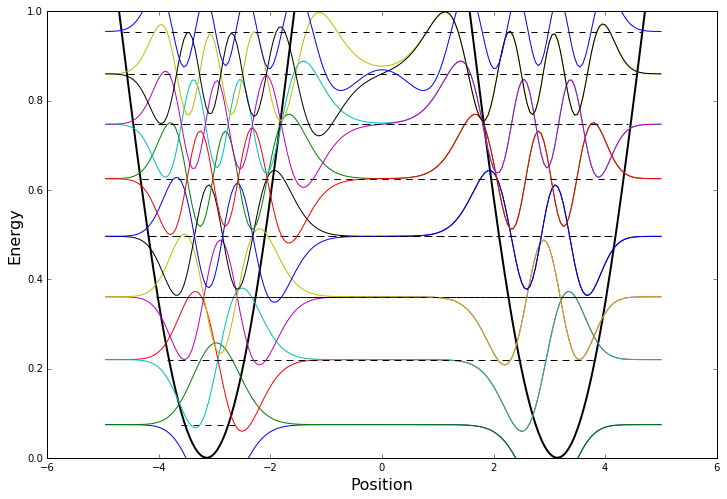

In [48]:
evals, evecs, x = eigensolver(U4, N=[200], domain=[[-5,5]], k_diag=[k])

print(evals[:5])
fig = figure(figsize=(12,8))
plot(x,U3(x),'k-',lw=2)
for n in range(15):
    Y=evecs[:,n]+evals[n]
    plot(x, Y, lw=1)
    mask = np.where(Y>U3(x))
    plot(x[mask],evals[n]*np.ones(x.shape)[mask],'k--')

ylim([0,1])
ylabel('Energy',fontsize=16)
xlabel('Position',fontsize=16)
show()

# 2D Flux Qubit Potential

In [49]:
Ec=1/80.
Ej=1
alpha = 0.8
gamma = 0.02
f = 0.5
k00 = -2 / (1 + gamma) * Ec / Ej
k11 = -2 / (1 + 2 * alpha + gamma) * Ec / Ej
k_diag=[k00,k11]
U5 = lambda x,y: 2+alpha-2*np.cos(x)*np.cos(y)-alpha*np.cos(2*np.pi*f+2*y)

In [52]:
evals,evecs,pnts = eigensolver(U5,N=[30,30],
                               domain=[[-np.pi,np.pi],[-np.pi,np.pi]],k_diag=k_diag)
evals[:5]

array([ 1.58760757,  1.58761207,  1.58923317,  1.58923797,  1.73286323])

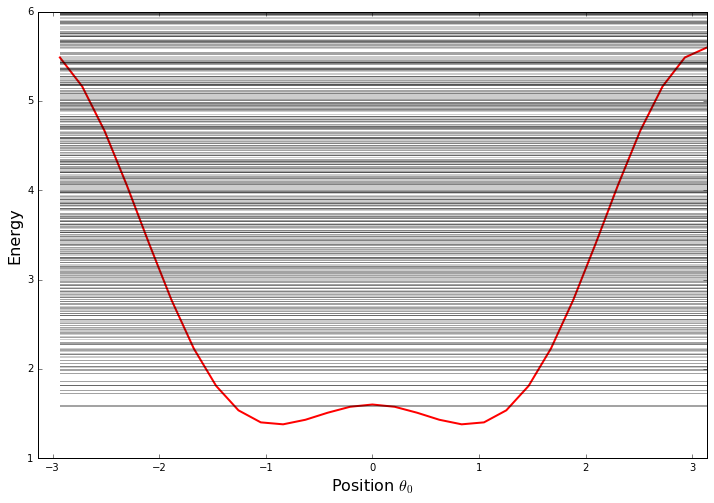

In [53]:
y=pnts[1]
Ux = U5(0,y)
fig = figure(figsize=(12,8))
plot(y,Ux,'r',lw=2)
for val in evals:
    plot(y,val*np.ones_like(y),'k',alpha=0.2)
ylim([1,6])
ylabel('Energy',fontsize=16)
xlabel('Position $\\theta_{0}$',fontsize=16)
xlim([-np.pi,np.pi])
show()

In [54]:
steps = 50
fvec = np.linspace(0.45,0.55,steps)
vals = np.zeros((20,steps))
for idx, f in enumerate(fvec):
    U6 = lambda x,y: 2+alpha-2*np.cos(x)*np.cos(y)-alpha*np.cos(2*np.pi*f+2*y)
    evals = eigensolver(U5,N=[20,20],domain=[[-np.pi,np.pi],[-np.pi,np.pi]],k_diag=k_diag,vals_only=True)
    vals[:,idx] = evals[:20]

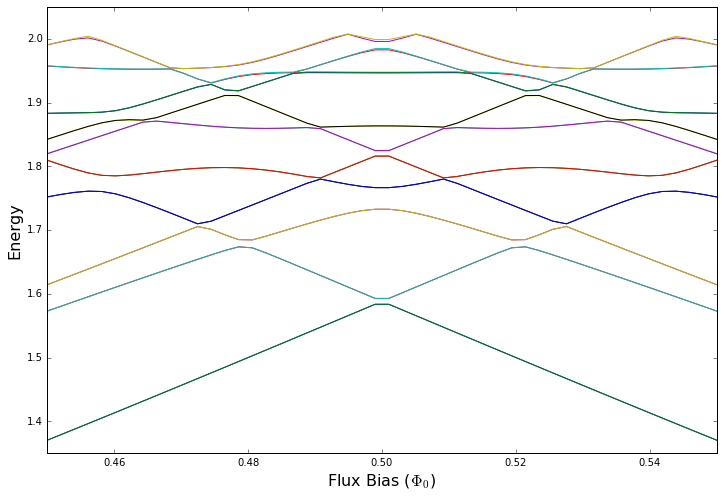

In [55]:
fig = figure(figsize=(12,8))
for k in range(20):
    plot(fvec,vals[k,:])
ylim([1.35,2.05])
xlim([0.45,0.55])
ylabel('Energy', fontsize=16)
xlabel('Flux Bias ($\Phi_{0}$)',fontsize=16)
show()

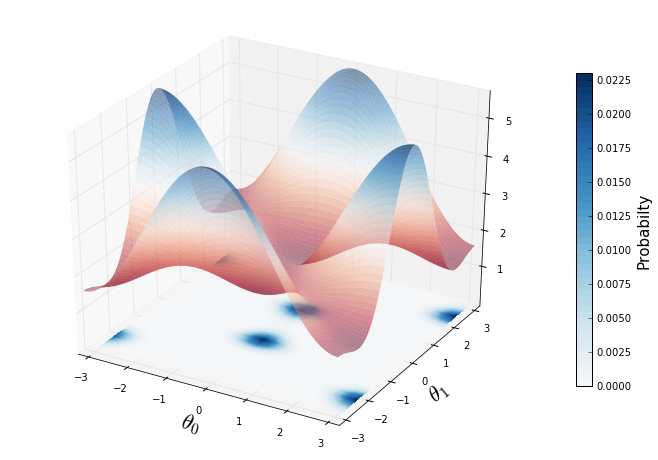

In [56]:
from mpl_toolkits.mplot3d import Axes3D

U7 = lambda x,y: 2+alpha-2*np.cos(x)*np.cos(y)-alpha*np.cos(2*np.pi*0.5+2*y)
evals, evecs, pnts = eigensolver(U7,N=[30,30],domain=[[-np.pi,np.pi],
                                [-np.pi,np.pi]],k_diag=k_diag)
x = np.linspace(-np.pi,np.pi,100)
[xx,yy] = np.meshgrid(x,x)
V = U7(xx,yy)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx,yy,V,rstride=1, cstride=1,linewidth=0,cmap=cm.RdBu,alpha=0.5)
[X,Y] = np.meshgrid(*pnts)
Z = np.abs(evecs[:,0].reshape((30,30)).T)**2
cf= ax.contourf(X,Y,Z,50,cmap=cm.RdBu,vmin=-Z.max(), vmax=Z.max())
cbar=colorbar(cf,shrink=0.7)
cbar.set_label(label='Probabilty',size=15)
xlabel('$\\theta_{0}$',fontsize=22)
ylabel('$\\theta_{1}$',fontsize=22)
show()



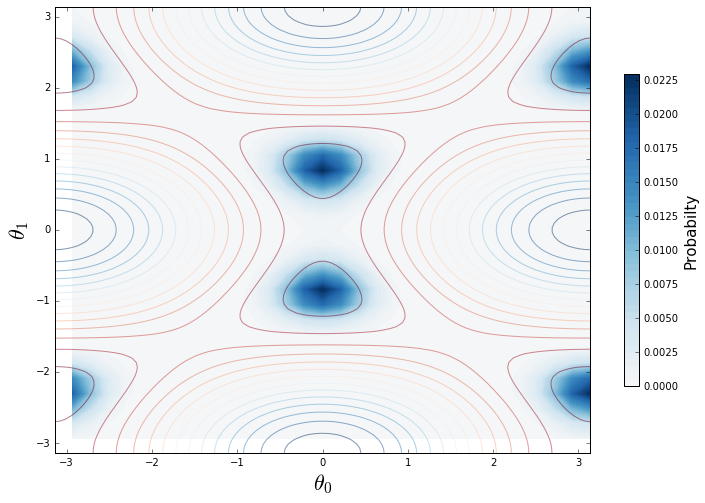

In [57]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.contour(xx,yy,V,15,cmap=cm.RdBu,alpha=0.5)
[X,Y] = np.meshgrid(*pnts)
Z = np.abs(evecs[:,0].reshape((30,30)).T)**2
cf= ax.contourf(X,Y,Z,50,cmap=cm.RdBu,vmin=-Z.max(), vmax=Z.max())
cbar=colorbar(cf,shrink=0.7)
cbar.set_label(label='Probabilty',size=15)
xlabel('$\\theta_{0}$',fontsize=22)
ylabel('$\\theta_{1}$',fontsize=22)
show()